![image.png](https://i.ibb.co/hg2Kd1X/seabornlogo.png)

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them

[Seaborn Source 01](https://seaborn.pydata.org/introduction.html), [Seaborn Source 02](https://seaborn.pydata.org/), [Seaborn Source 03](https://www.youtube.com/watch?v=GcXcSZ0gQps), [Seaborn Source 04](https://www.youtube.com/watch?v=6GUZXDef2U0) & [Seaborn Source 05](https://www.youtube.com/watch?v=Pkvdc2Z6eBg)

In [ ]:
# A detailed plot including almost everything to make a plot look better
# source : https://www.youtube.com/watch?v=fbG5odHUHSc&list=WL&index=6

unique_names_per_gender.plot(figsize=(10, 5), linewidth=3,
                             color=['firebrick', 'gray']
                            )

# Axes labels
plt.xlabel('')
plt.ylabel("Unique Names\nin Dataset",
           rotation=0,
           position=(-.1, .9),
           fontsize=16,
           ha='left',
           labelpad=125,
           color='gray'
          )

# Remove box
sns.despine()

# Set y-limits and remove legend
plt.ylim(0, None)
plt.legend([], frameon=False)

# Title
plt.title("Fewer females in the dataset but far more names for them\n",
          fontsize=18, loc='left'
         )

# Annotations
plt.text(2018, 5500, "Females", color='firebrick', fontsize=16, fontweight='bold')
plt.text(2018, 4400, "Males", color='gray', fontsize=16, fontweight='bold')
plt.text(2018.5, 5200, f'{female_perc*100:.0f}% of babies', fontsize=12, color='gray', fontstyle='italic')
plt.text(2018.5, 4100, f'{male_perc*100:.0f}% of babies', fontsize=12, color='gray', fontstyle='italic')

# Tick labels
ax = plt.gca()
ax.tick_params(axis='both', colors='gray', labelsize=14, length=0)

g = ax.get_yticks()
plt.yticks(g[1:])

ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda x,p: format(str(int(x/1000))+'K'))
)

# Save figure
#plt.savefig('baby_names_final.png', dpi=200, bbox_inches='tight');

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">CONTENT</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [COUNTPLOT](#1)
    * ["hue" Parameter](#1.1)
    * [Extra Information](#1.2)
* [BARPLOT](#2)
    * ["errorbar" Parameter](#2.1)
    * ["estimator" Parameter](#2.2)    
* [BOXPLOT](#3)
    * ["width" Parameter](#3.1)
    * [Optional Boxplot Examples](#3.2)
    * ["orient" Parameter](#3.3)
    * [Changing x & y](#3.4)
* [VIOLINPLOT](#4)
    * [Optionel Violinplot Example](#4.1)
    * ["split" Parameter](#4.2)
    * ["inner" Parameter](#4.3)
    * ["bandwidth" Parameter](#4.4)
    * [Changing x & y](#4.5)
* [SWARMPLOT](#5) 
    * [Optional Swarmplot Example](#5.1)
    * ["dodge" Parameter](#5.2)
* [BOXENPLOT (LETTER-VALUE PLOT)](#6)        
* [LINEPLOT](#7)
* [THE END OF THE SEABORN SESSION 02](#8)    

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [ ]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=14)
plt.rcParams["figure.figsize"]=(10,5)

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:CENTER; border-radius:10px 10px;">COUNTPLOT</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

A simple plot, it merely shows the total count of rows per category. 

Countplot, kategorik bir değişkenin dağılımını bize verir ve genellikle her kategorinin sıklığını görüntülemek için kullanılır.

Barplot, sayısal bir değişkenin ortalama değerini farklı kategoriler arasında karşılaştırmak için kullanılır ve genellikle iki değişken arasındaki ilişkiyi görselleştirmek için kullanılır. **Default olarak mean kullanır. Estimator ile degistirilebilir.**

In [3]:
tips.day.value_counts()
# countplot bunun visualize hali

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

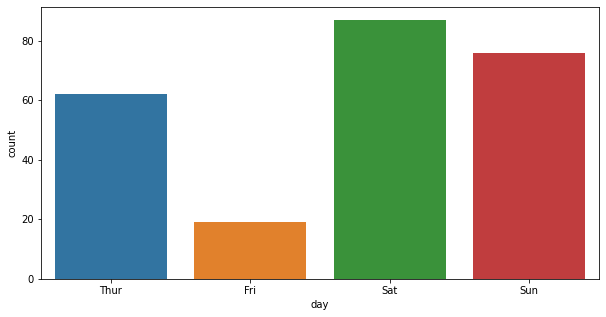

In [7]:
sns.countplot(x="day", data= tips);

**How to annotate?**

[SOURCE](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html)

<Axes.ArtistList of 4 patches>
Rectangle(xy=(-0.4, 0), width=0.8, height=62, angle=0)


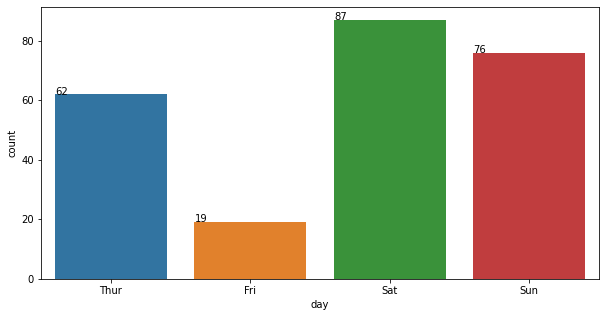

In [12]:
# 2 yontem var, 2.si daha kolay ve yeni
# 1: klasik yontem
fig, ax = plt.subplots()
ax = sns.countplot(x="day", data= tips);
# ax'ı taımladıktan sonra onun metotlarını kullanırız. patches metodu icindeki

print(ax.patches)  # <Axes.ArtistList of 4 patches> cikti. bu countplot uzerindeki 4 bar. dolayısıyla bir list ve
# indekslenebilir. 0ını indeklseyelim

print(ax.patches[0])  # Rectangle(xy=(-0.4, 0), width=0.8, height=62, angle=0). height dedigi count. bu height degerini
# bar ustune get_height ile yazdırabiliriz

# print(ax.patches[0].get_height())  # 62 cikti

# for dongusu ile yazdıralım ustlerine

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()))  
# annotate doc str: ilk önce "text", 2 . olarak x-y koordinatları verilir. x icin p.get_x(), y icin p.get_height() 
# asagida duzenleyelim bunları

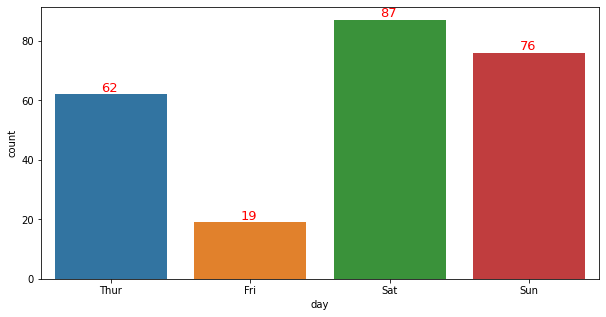

In [17]:
fig, ax = plt.subplots()
ax = sns.countplot(x="day", data= tips);

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.33, p.get_height()+1), color="red", size=13) 

In [ ]:
# 2. ve basit yontem

[<BarContainer object of 4 artists>]


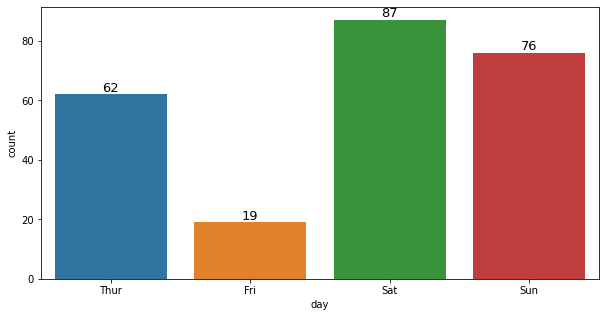

In [21]:
fig, ax = plt.subplots()
ax = sns.countplot(x="day", data= tips);
print(ax.containers)  # icinde 4 obje olan tek bir nesne bu, yani bir list, bunu indeksleyelim
# print(ax.containers[0])

ax.bar_label(ax.containers[0], size = 13);

# barlara yerlestirmeyi vs kendisi yaptı hep ortalamayı..

In [127]:
# neye gore orderlıyor ve nasıl degistirebiliriz
aa = tips.day.cat.categories
aa = aa[::-1]
aa

Index(['Sun', 'Sat', 'Fri', 'Thur'], dtype='object')

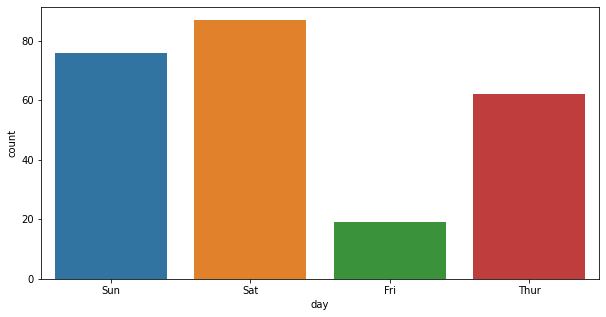

In [128]:
sns.countplot(x="day", data=tips, order = aa);
# ya da en dusukten en yuksege dogru order belirleyelim asagida:

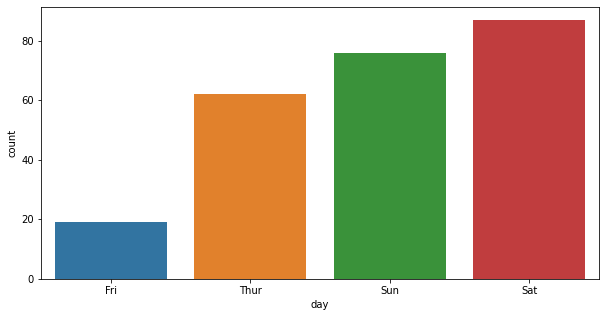

In [129]:
tips.day.value_counts().sort_values()
bb = tips.day.value_counts().sort_values().index
sns.countplot(x="day", data=tips, order = bb);

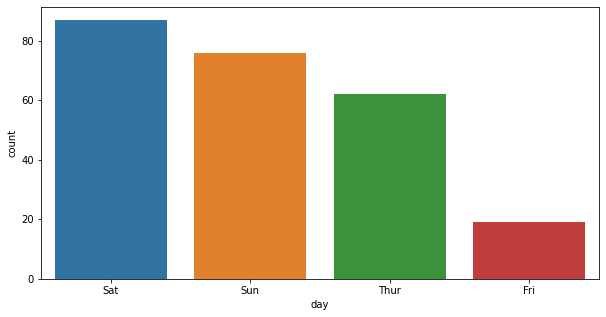

In [130]:
sns.countplot(x="day", data=tips, order = tips.day.value_counts().index[::1]);

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">"hue" Parameter</p>

<a id="1.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

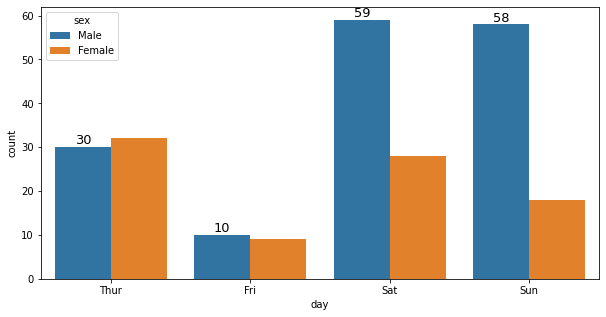

In [23]:
# sex kategorisi icin hue ekleyelim. ama asagida gorundugu uzere sadece male icin degerleri yazdirdi.
# cunku container[0].. sadece ilk elemanı indeksledik. burada ise iki eleman var.
fig, ax = plt.subplots()
ax = sns.countplot(x="day", data= tips, hue="sex");

ax.bar_label(ax.containers[0], size = 13);

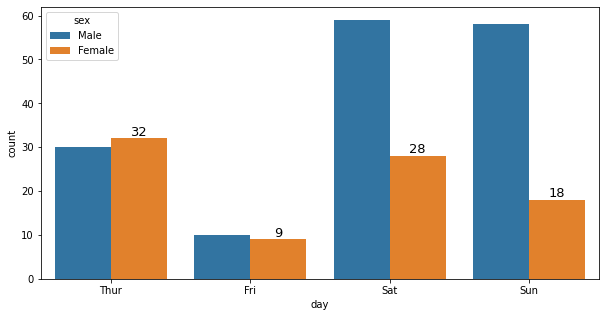

In [24]:
fig, ax = plt.subplots()
ax = sns.countplot(x="day", data= tips, hue="sex");
# bu da sadece femalleri yazdırır
ax.bar_label(ax.containers[1], size = 13);

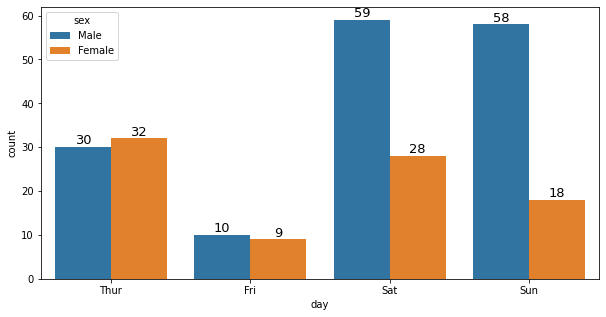

In [25]:
fig, ax = plt.subplots()
ax = sns.countplot(x="day", data= tips, hue="sex");
# ikisini birden yazdırmak icin:
ax.bar_label(ax.containers[0], size = 13);
ax.bar_label(ax.containers[1], size = 13);

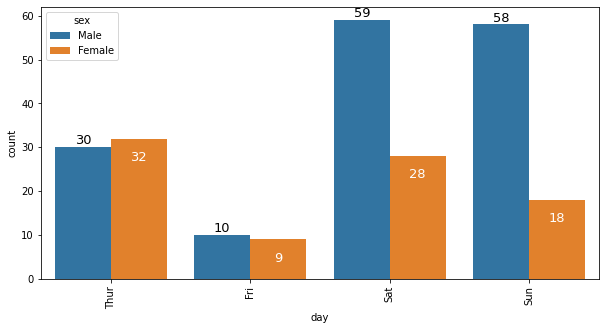

In [28]:
# bu degerleri barların icinde yazıdmrka icin padding parametresini degistiririz. default 0, - yaparız

fig, ax = plt.subplots()
ax = sns.countplot(x="day", data= tips, hue="sex");
# ikisini birden yazdırmak icin:
plt.xticks(rotation= "vertical")
ax.bar_label(ax.containers[0], size = 13);
ax.bar_label(ax.containers[1], size = 13, padding=-25, color="white");

# HOW TO CREATE A NEW DF FROM VALUE_COUNTS.HEAD(N) AND PLOT BAR AND COUNT PLOTS FROM THIS NEW DF

In [4]:
kill = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")
kill.dropna(inplace=True)
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


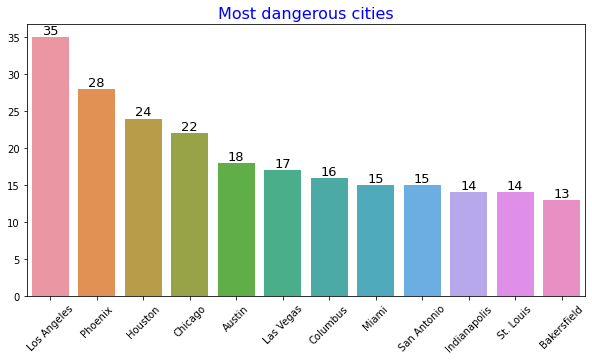

In [141]:
# PLOT THE BAR AND COUNT PLOT OF THE MOST DANGEROUS 12 CITIES

kill.city.value_counts().head(12)

# BARPLOT

x = kill.city.value_counts().head(12).index
y = kill.city.value_counts().head(12).values

fig,ax = plt.subplots()

sns.barplot(x = x, y=y)
plt.xticks(rotation=45)
plt.title("Most dangerous cities",fontdict={'fontsize': 16, "color" : "blue"})

ax.bar_label(ax.containers[0], size = 13);

In [5]:
# 1. yontem: merge ile 
# FOR COUNTPLOT, WE HAVE TO FIRST CREATE A NEW DATASET

kill_city = kill.city.value_counts().head(12)
df = pd.DataFrame({'city':kill_city.index}).merge(kill, how='left')
df.head(1)

,city,id,name,date,manner_of_death,armed,age,gender,race,state,signs_of_mental_illness,threat_level,flee,body_camera
0,Los Angeles,75,Pablo Meza,17/01/15,shot,gun,24.0,M,H,CA,False,attack,Not fleeing,False


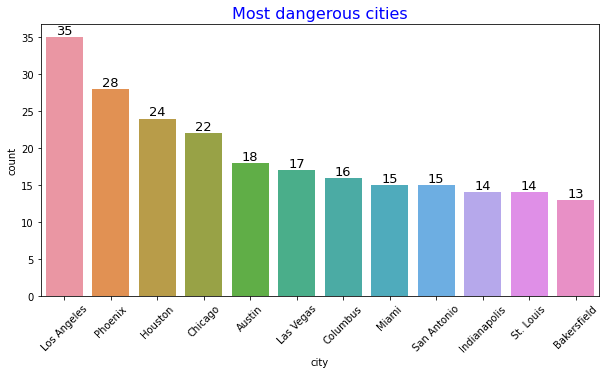

In [144]:
fig,ax = plt.subplots()
sns.countplot(x="city", data=df)
plt.xticks(rotation=45)
plt.title("Most dangerous cities",fontdict={'fontsize': 16, "color" : "blue"})

ax.bar_label(ax.containers[0], size = 13);

# Order parametresi ile cozumu

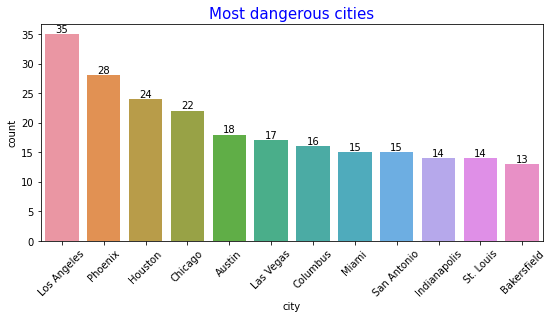

In [7]:
# 2. yontem daha kolay: order olmasaydi asagiya 1400 sehr x eksenine olurdu. ama ordr ile kisitliyoruz

fig, ax = plt.subplots(figsize=(9,4))

sns.countplot(x = "city", data = kill, order = kill.city.value_counts().head(12).index)

ax.set_xticklabels(kill.city.value_counts().head(12).index, rotation = 45)
ax.set_title("Most dangerous cities",
            color= "blue",
            fontsize = 15,
            pad = 5,
            fontdict = {"fontsize" : 5})
ax.bar_label(ax.containers[0],size=10);

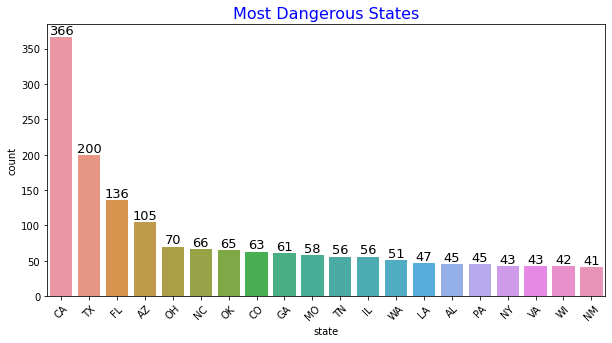

In [145]:
# COUNTPLOT FOR MOST DANGEROUS 20 STATES

kill_state = kill.state.value_counts().head(20)
df_state = pd.DataFrame({'state':kill_state.index}).merge(kill, how='left')

fig,ax = plt.subplots()

sns.countplot(x="state", data=df_state)
plt.xticks(rotation=45)
plt.title("Most Dangerous States",fontdict={'fontsize': 16, "color" : "blue"})

ax.bar_label(ax.containers[0], size = 13);

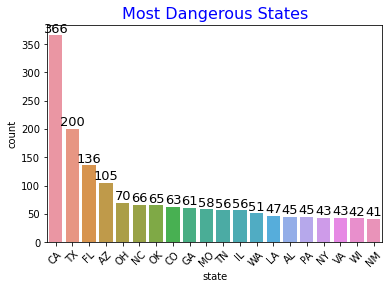

In [8]:
fig, ax = plt.subplots()
sns.countplot(x = "state", data= kill, order = kill.state.value_counts().head(20).index)

plt.xticks(rotation=45)
plt.title("Most Dangerous States",fontdict={'fontsize': 16, "color" : "blue"})

ax.bar_label(ax.containers[0], size = 13);

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Extra Information</p>

<a id="1.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

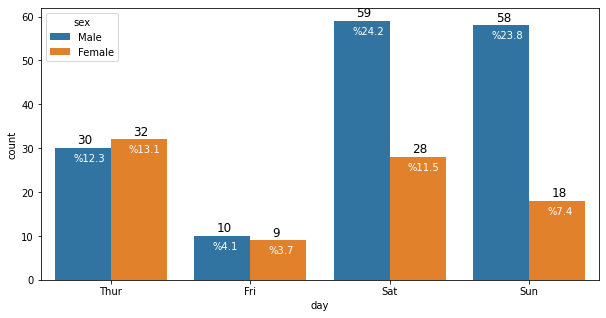

In [30]:
fig, ax = plt.subplots()
ax = sns.countplot(x='day', data=tips, hue="sex")

for p in ax.patches:
    ax.annotate(p.get_height(),
                (p.get_x()+0.16, p.get_height()+1),
                size=12)
    
    ax.text(p.get_x()+0.13, p.get_height()-3, "%"+str(round(100*p.get_height()/tips.day.count(),1)), color="white")

# ax.text() ile iclerine istedigimizi yazdırabiliriz. doc str: once koordinatlar sonra "text" yazılır parametre

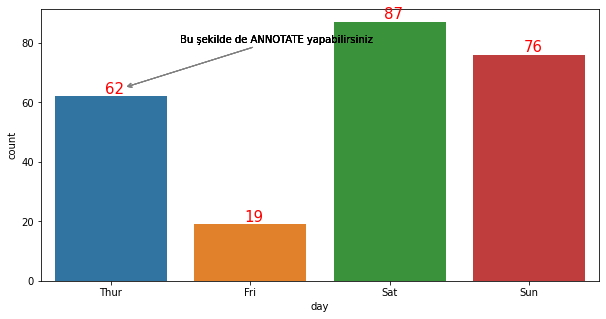

In [35]:
# annotate su sekilde de yapılabilri

fig, ax = plt.subplots()
ax = sns.countplot(x='day', data=tips)

#print(ax.patches)
#print(ax.patches[0])
#print(ax.patches[0].get_height())

for p in ax.patches:
    ax.annotate(round(p.get_height()),
               (p.get_x()+0.36, p.get_height()+1),
               size=15,
               color="red")
# burada for dongusu icinde oldugu icin 4 kere ustuste gri yazdırdı. dongu disina cikarip tek sefer de yazdırılabilir

    ax.annotate("Bu şekilde de ANNOTATE yapabilirsiniz", 
                xy=(0.1, 65), 
                xytext=(0.5, 80), 
                arrowprops={"arrowstyle":"->", "color":"gray"});

In [36]:
# baska bir datasette islemler yapalım

mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


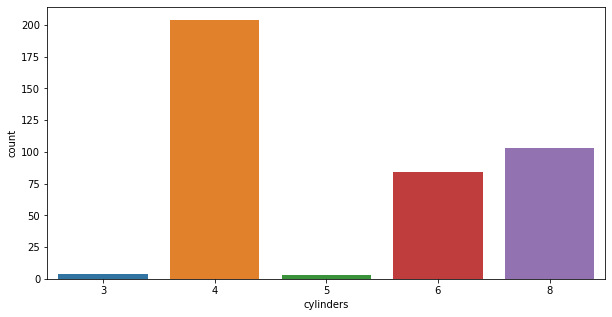

In [37]:
# cylinders da kategorik bir veri
sns.countplot(x="cylinders", data = mpg);

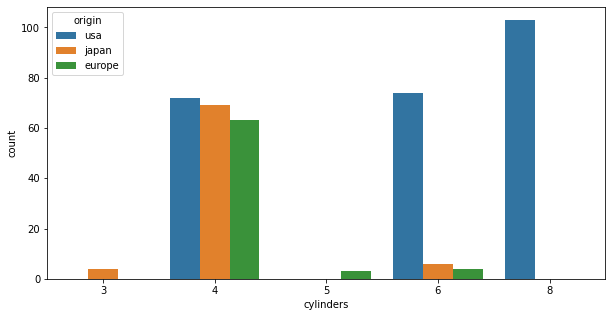

In [38]:
sns.countplot(x = "cylinders", data=mpg, hue="origin");

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:CENTER; border-radius:10px 10px;">BARPLOT</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

So far we've seen the y axis default to a count (similar to a .groupby(x_axis).count() call in pandas). We can expand our visualizations by specifying a specific continuous feature for the y-axis. Keep in mind, you should be careful with these plots, as they may imply a relationship continuity along the y axis where there is none

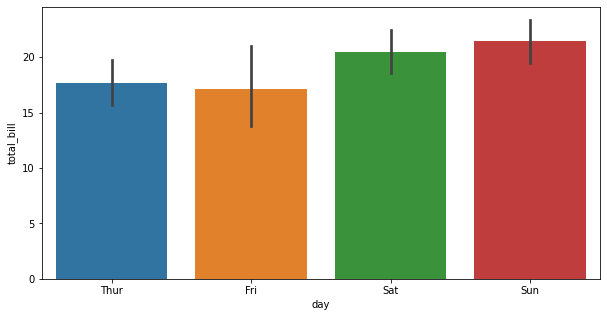

In [40]:
# sns.barplot(data=tips, x="day");
# error verir bu : TypeError: Horizontal orientation requires numeric `x` variable.

sns.barplot(data=tips, x="day", y="total_bill");
# default olarak mean. ornegin persembe tot bill ortalamsı 17 gibi

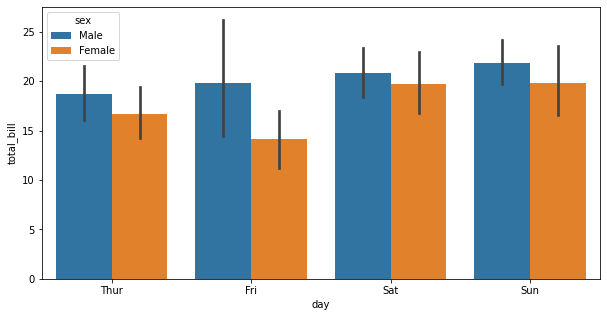

In [41]:
sns.barplot(data=tips, x="day", y="total_bill", hue="sex");

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">"errorbar" Parameter</p>

<a id="2.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**confidence interval, ci parameter (yeni surumde errorbar oldu)**

Ci: rastgele alınan bir sampleın yuzde kacinin o cizgi araliginda olacagini gosterir. default %95. % 60 gormek istersek ci 60 yaparız. veya ci yerine std veya max da gosterebiliriz

Güven aralığı (Ci) değerini azalttıkça çubuk küçülecek, arttırdıkça çubuk büyüyecektir. Çünkü bir ortalamayı daha büyük bir doğrulukla tutturabilmeniz için tahminlerinizin daha büyük bir aralıkta olması gerekir.
Başka bir deyişle; verinin ortalama değeri şu ile şu değerler arasındadır dediğinde bu ifadenin doğruluğunun daha yüksek olması (hata payının daha küçük olması) için o aralık değerini büyük tutmak gerekir. Aralık azalttıkça doğruluk oranı da tabi ki azalacaktır.

In [ ]:
# !pip install seaborn --upgrade --user

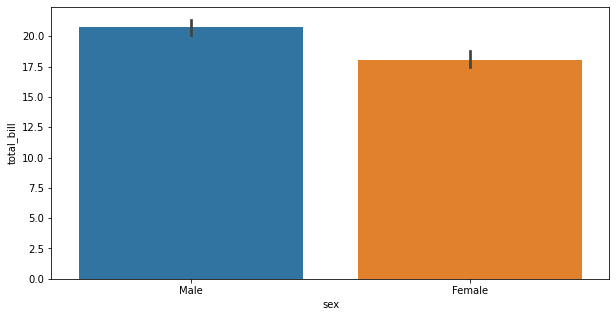

In [43]:
sns.barplot(data=tips, x="sex", y="total_bill", ci =60);

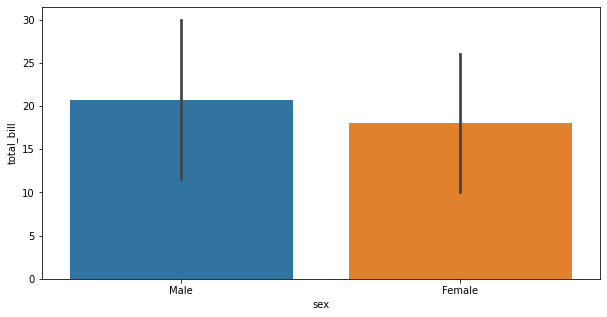

In [44]:
# std gostersin
sns.barplot(data=tips, x="sex", y="total_bill", ci ="sd");

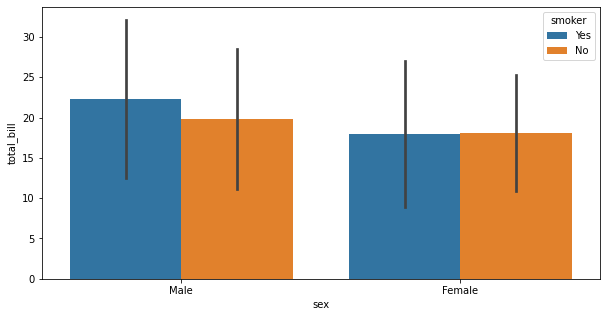

In [46]:
#
sns.barplot(data=tips, x="sex", y="total_bill", ci="sd", hue="smoker");

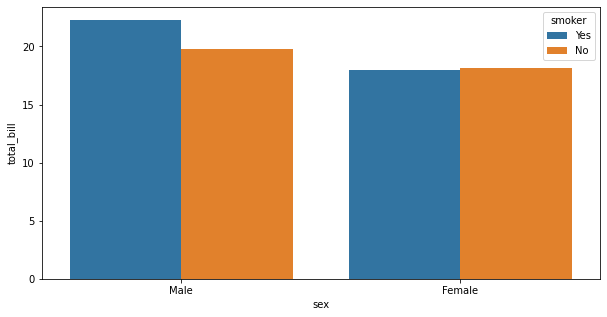

In [47]:
# cileri gormek istemiyorsak none yaparız
sns.barplot(data=tips, x="sex", y="total_bill", ci=None, hue="smoker");

**Correlation Between Height and Weight**<br>
At the beginning of the Spring 2017 semester a sample of World Campus students were surveyed and asked for their height and weight. In the sample, Pearson's r = 0.487. A 95% confidence interval was computed of [0.410, 0.559].

The correct interpretation of this confidence interval is that we are 95% confident that the correlation between height and weight in the population of all World Campus students is between 0.410 and 0.559.

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">"estimator" Parameter</p>

<a id="2.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

"estimator" params (np.mean, np.median, np.sum, np,max, np.min, np.count_nonzero)

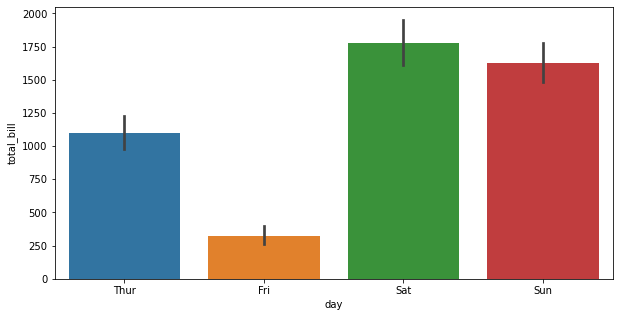

In [49]:
sns.barplot(data=tips, x="day", y="total_bill", estimator= np.sum);

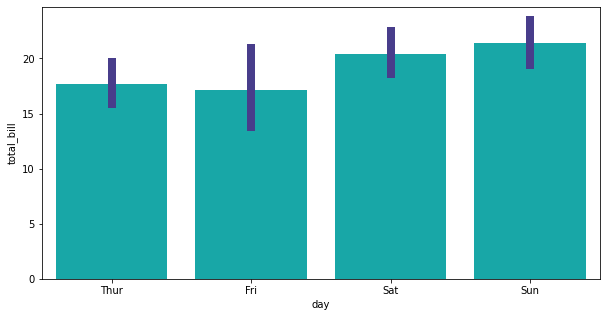

In [132]:
# errcolor  and errwidth 
sns.barplot(x = "day", y = "total_bill", data= tips, color = "c", errcolor='darkslateblue',errwidth=8);

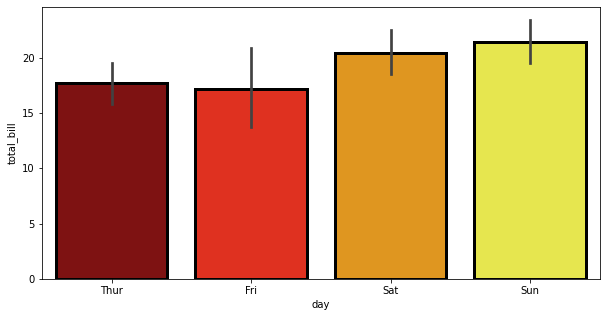

In [133]:
# farklı renkler icin palette
# edgecolor and linewidth lw
sns.barplot(x = "day", y = "total_bill", data= tips, color = "c", palette = "hot", edgecolor = "black", lw=3);

In [51]:
# bu grafigin pandas kod karsiligi
tips.groupby(["day", "sex"])[["total_bill"]].sum()

total_bill
day  sex               
Thur Male        561.44
     Female      534.89
Fri  Male        198.57
     Female      127.31
Sat  Male       1227.35
     Female      551.05
Sun  Male       1269.46
     Female      357.70

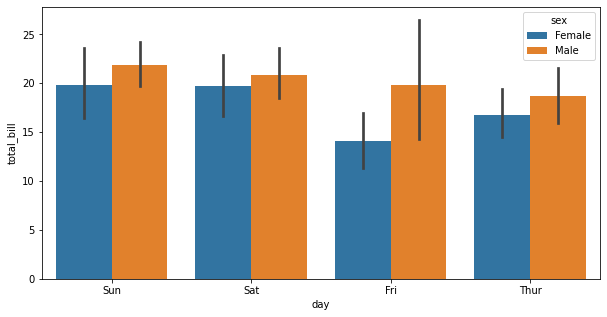

In [131]:
# order ile x labellar-barlar, hue order ile kategorik degiskenler degistirilebilir
sns.barplot(x = "day", y = "total_bill", hue = "sex", hue_order=["Female", "Male"], order =["Sun", "Sat", "Fri", "Thur"], data= tips);

**diferences betwen barplot and count plot**

<AxesSubplot:xlabel='day', ylabel='count'>

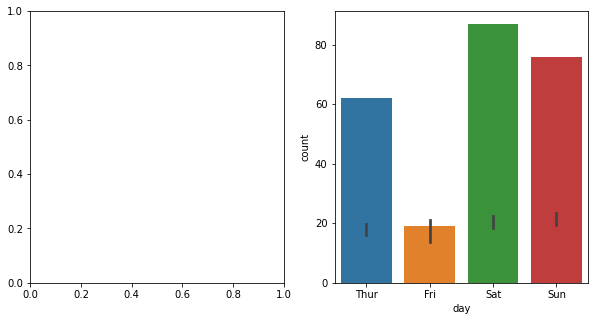

In [52]:
fig, ax = plt.subplots(1,2)

sns.barplot(x="day", y="total_bill", data=tips)
sns.countplot(x="day", data=tips)

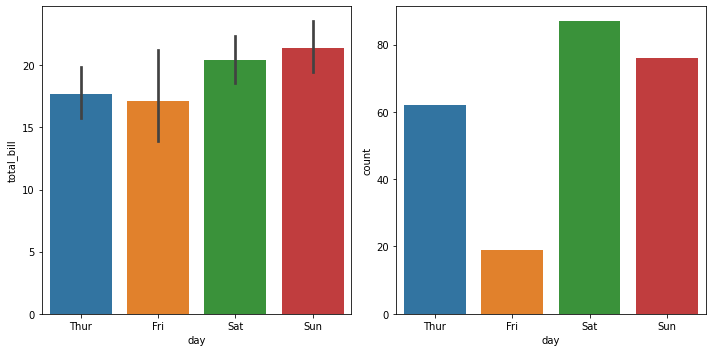

In [53]:
# 1. yontem
# seaborn icindeki ax parametresi ile oynatarak bu hatayı giderebiliriz

fig, ax = plt.subplots(1,2)

sns.barplot(x="day", y="total_bill", data=tips, ax=ax[0])
sns.countplot(x="day", data=tips, ax=ax[1])

plt.tight_layout()

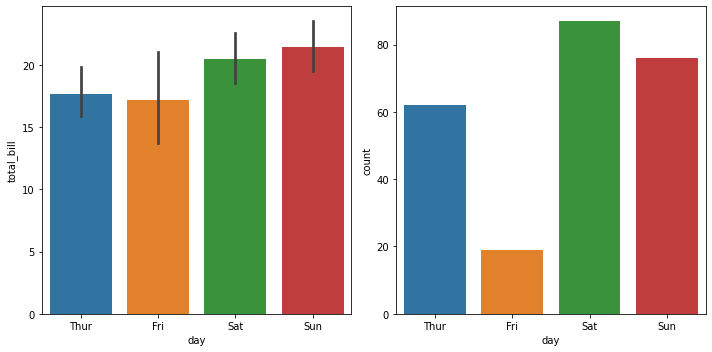

In [54]:
# 2. yontem

fig, (ax1,ax2) = plt.subplots(1,2)

sns.barplot(x="day", y="total_bill", data=tips, ax=ax1)
sns.countplot(x="day", data=tips, ax=ax2)

plt.tight_layout()

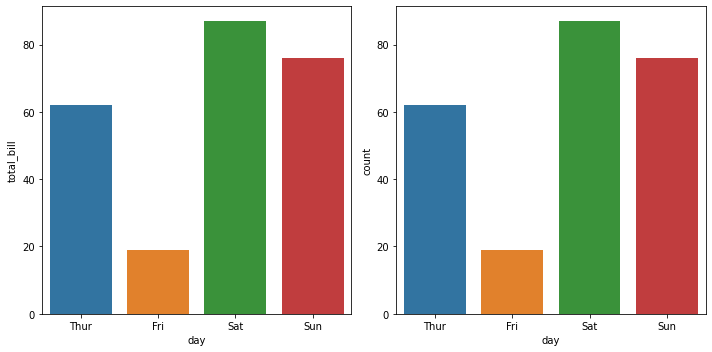

In [126]:
# countplot kategorik veri dagilimi; barplot ise total bille gore bir hesaplama yapti . 
# barplotu da countplot gibi yapmak icin estimator parametresini degistiririz
fig, (ax1,ax2) = plt.subplots(1,2)

sns.barplot(x="day", y="total_bill", data=tips, ax=ax1, estimator=np.count_nonzero)
sns.countplot(x="day", data=tips, ax=ax2)

plt.tight_layout()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:CENTER; border-radius:10px 10px;">BOXPLOT</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

[SOURCE 01](https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-box-whisker-plots/v/constructing-a-box-and-whisker-plot) & [SOURCE 02](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

As described in the videos, a boxplot display distribution through the use of quartiles and an IQR for outliers.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

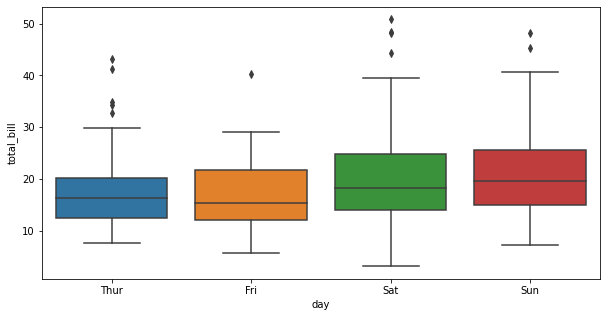

In [56]:
sns.boxplot(x="day", y="total_bill", data=tips)

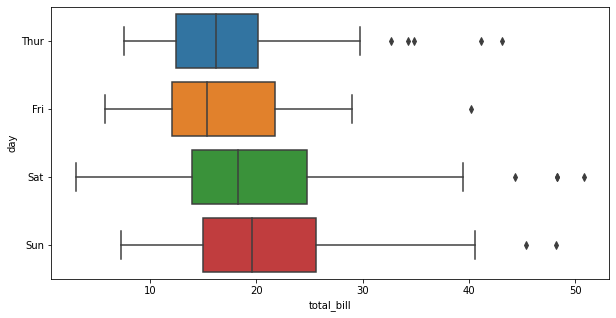

In [58]:
# horizontal icin x ve y degistiririz
sns.boxplot(y="day", x="total_bill", data=tips);

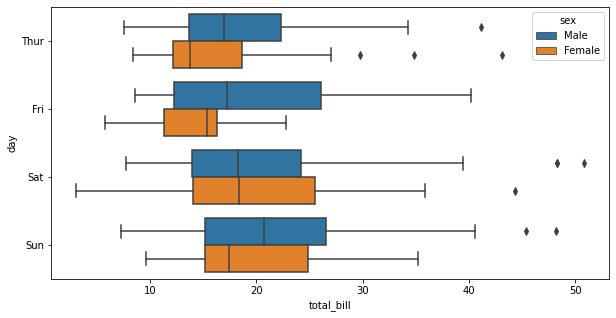

In [60]:
# hue de eklenebilir
sns.boxplot(y="day", x="total_bill", data=tips, hue="sex");

In [135]:
# bir numeric columndan kategorik bir feature olusturup ona gore boxplt olcelim
tips["tip_amount"] = tips.tip > 5
tips.tip_amount

0      False
1      False
2      False
3      False
4      False
       ...  
239     True
240    False
241    False
242    False
243    False
Name: tip_amount, Length: 244, dtype: bool

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

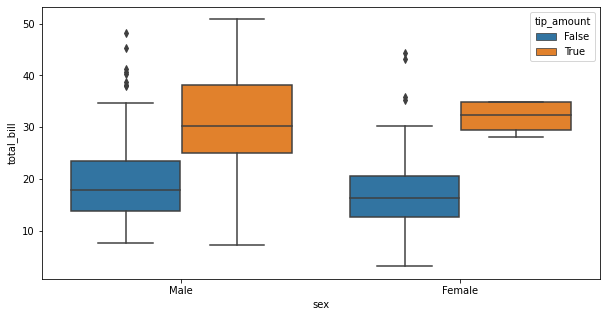

In [136]:
sns.boxplot(x="sex", y = "total_bill", data=tips, hue = "tip_amount")

In [137]:
tips.groupby("sex")["total_bill"].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

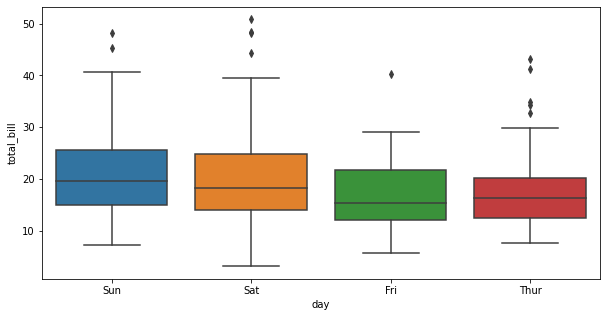

In [138]:
# STYLING

sns.boxplot(x ="day", y= "total_bill", order=["Sun", "Sat", "Fri", "Thur"], data=tips);

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">"width" Parameter</p>

<a id="3.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<AxesSubplot:xlabel='day', ylabel='total_bill'>

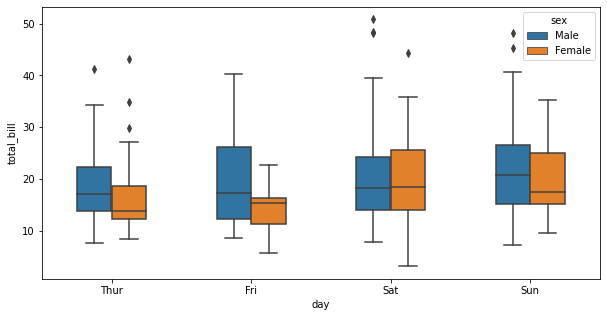

In [61]:
# width parametresi defaul 0.8. 
sns.boxplot(x="day", y="total_bill", data=tips, hue="sex", width=0.5)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

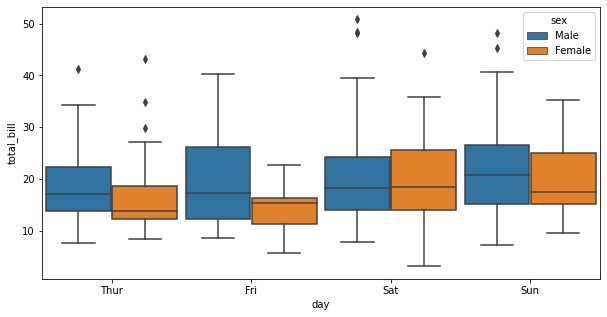

In [63]:
sns.boxplot(x="day", y="total_bill", data=tips, hue="sex", width=0.95)

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Optional Boxplot Examples</p>

<a id="3.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [64]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


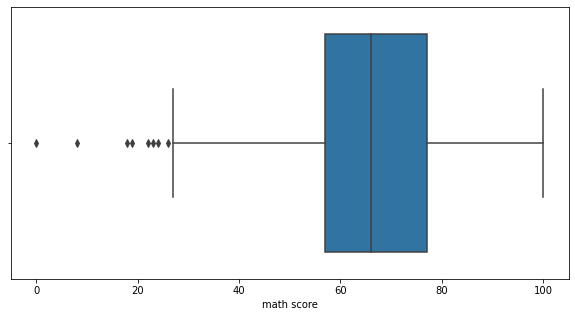

In [65]:
# math scorelara gore bir box plotla baslayalım

sns.boxplot(x = "math score", data=df);

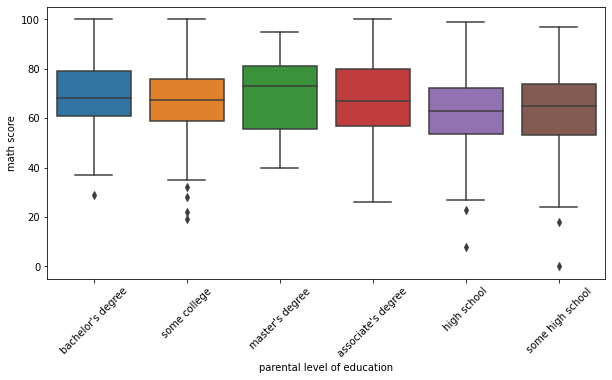

In [67]:
# kategorik feature ekleyelim
sns.boxplot(x= "parental level of education" , y = "math score", data=df)
plt.xticks(rotation=45);
# aile master olanlar medianı en yukse olanlar.

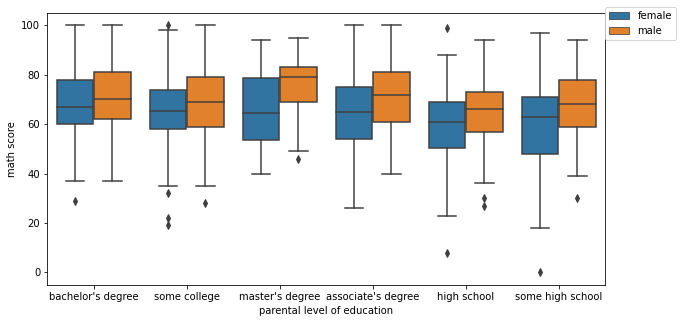

In [69]:
sns.boxplot(x= "parental level of education" , y = "math score", data=df, hue="gender");
# legendi disariya almak icin
plt.legend(loc=(1,0.9))

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">VIOLINPLOT</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

Violin plot: In general, violin plots are a method of plotting numeric data and can be considered a combination of the box plot with a kernel density plot. In the violin plot, we can find the same information as in the box plots:

median (a white dot on the violin plot)

interquartile range (the black bar in the center of violin)

the lower/upper adjacent values (the black lines stretched from the bar) — defined as first quartile — 1.5 IQR and third 

quartile + 1.5 IQR respectively. These values can be used in a simple outlier detection technique (Tukey’s fences) — observations lying outside of these “fences” can be considered outliers.

Violinplot = kdeplot + boxplot

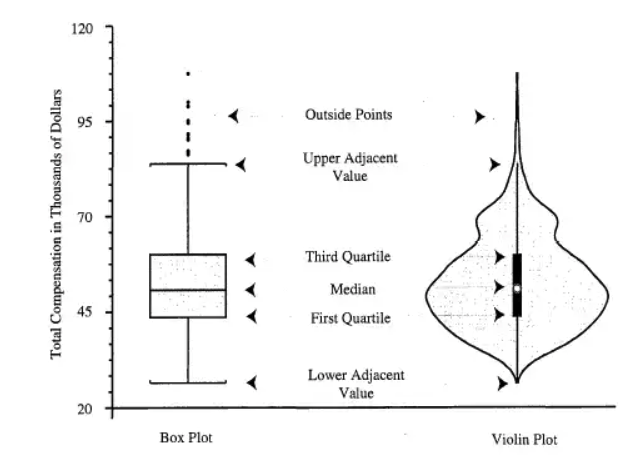

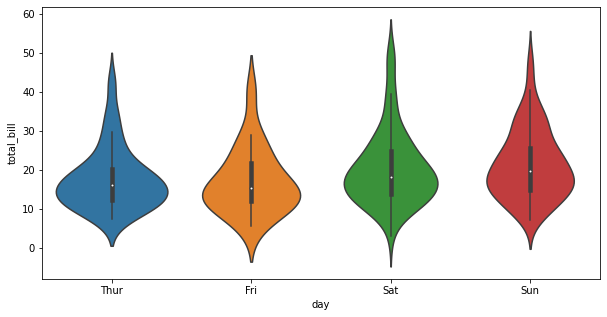

In [71]:
sns.violinplot(x="day", y="total_bill", data=tips);

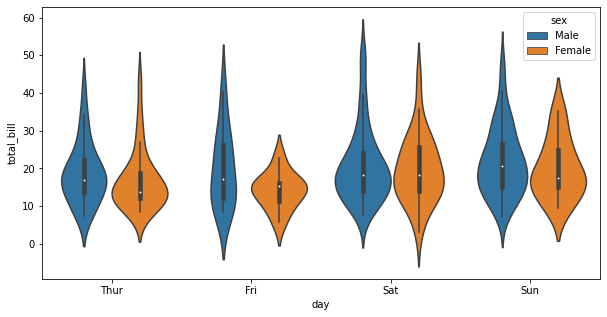

In [72]:
sns.violinplot(x="day", y="total_bill", data=tips, hue="sex");

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Optional Violinplot Example</p>

<a id="4.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [73]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


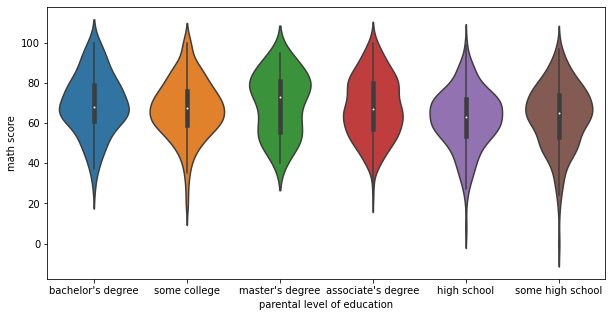

In [74]:
sns.violinplot(x="parental level of education", y="math score", data=df);

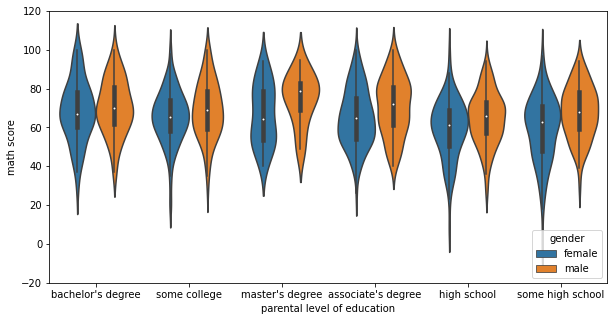

In [75]:
# hue gender ekleyelim
sns.violinplot(x="parental level of education", y="math score", data=df, hue="gender");

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">"split" Parameter</p>

<a id="4.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

When using hue nesting with a variable that takes two levels, setting split to True will draw half of a violin for each level. This can make it easier to directly compare the distributions.

Ama kullandığımız hue degerinin 2 degerden olusmasına dikkat. 2den fazlaysa olmaz

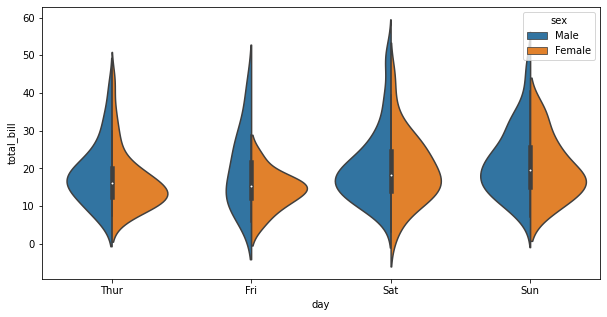

In [76]:
sns.violinplot(x="day", y="total_bill", data=tips, hue="sex", split=True);
# zaten kdelerin her iki tarafı simetrik. bu nedenle ekstra grafiklerden kurtulur. dagilimlarl ailigli de
# daha rahat karsilastirma yapabiliriz. Ama dezavantajı ise male ve femaleller icin median, quartile vs ayrıca gorunmez

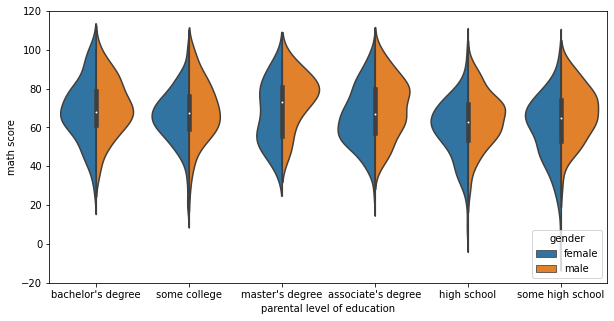

In [77]:
sns.violinplot(x="parental level of education", y="math score", data=df, hue="gender", split=True);

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">"inner" Parameter</p>

<a id="4.3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

default: inner='box'

Representation of the datapoints in the violin interior. If box, draw a miniature boxplot. If quartiles, draw the quartiles of the distribution. If point or stick, show each underlying datapoint. Using None will draw unadorned violins.

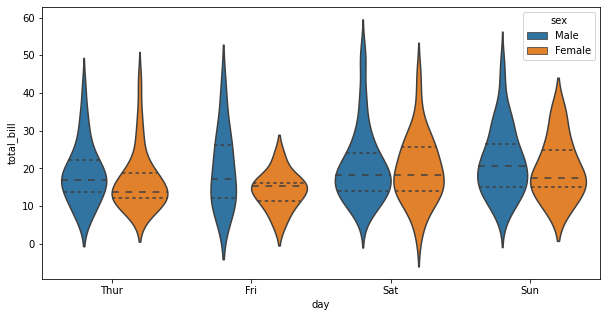

In [79]:
sns.violinplot(x="day", y="total_bill", data=tips, hue="sex", inner="quartile");

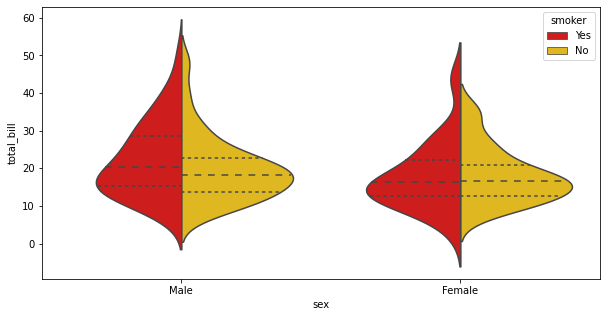

In [80]:
# split gosterimin boxu gostermemesi dezavantajını da boylece kaldirmis oluruz
sns.violinplot(x="sex", y="total_bill", hue="smoker", split=True, inner = "quartiles", data=tips, palette="hot");

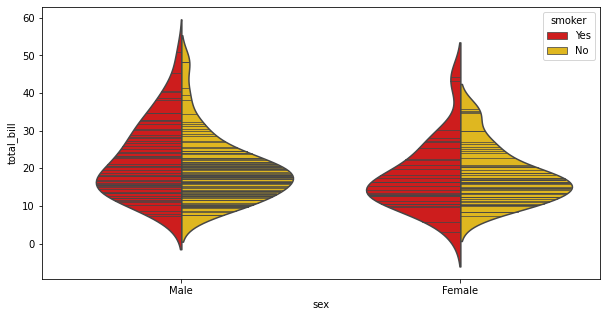

In [81]:
sns.violinplot(x="sex", y="total_bill", hue="smoker", split=True, inner = "stick", data=tips, palette="hot");
# total_billin degerlerinin karsilik geldigi ticksler...

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">"bandwidth" Parameter</p>

<a id="4.4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Similar to bandwidth argument for kdeplot

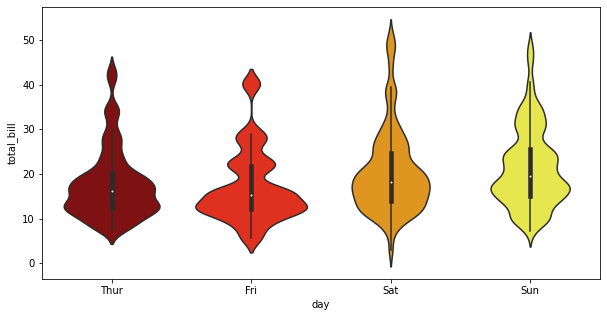

In [84]:
sns.violinplot(x="day", y="total_bill", data=tips, bw=0.2);
# bw azaltildikca daha hassas bir dagilim olur

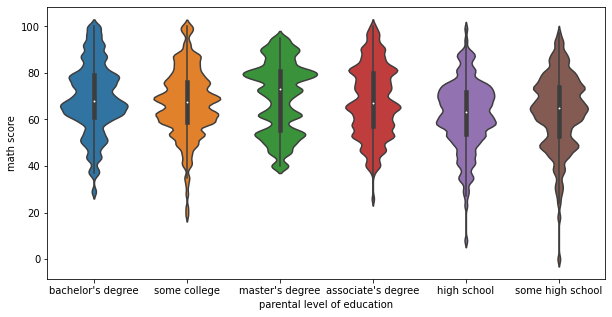

In [86]:
sns.violinplot(x= "parental level of education", y="math score", data=df, bw=0.1);

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">SWARMPLOT</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

seaborn.swarmplot(x=None, y=None, hue=None, data=None, palette=None)

Draw a categorical scatterplot with non-overlapping points.

Points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, but it does not scale well to large numbers of observations.
A swarm plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

**Swarmplot is considered as a categorical scatter plot**

- büyük veri setlerinde tavsiye edilmez

- noktaları ayırmak istersek dodge parametresini True yaparız

- tek basina cok sey ifade etmiyor, bu nednele box veya violinplot ile kullanabiliriz

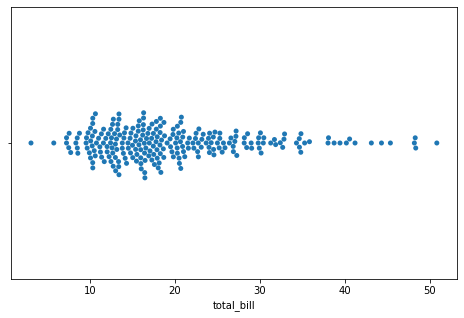

In [88]:
plt.figure(figsize=(8,5))
sns.swarmplot(x="total_bill", data=tips);

/Users/kadiryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


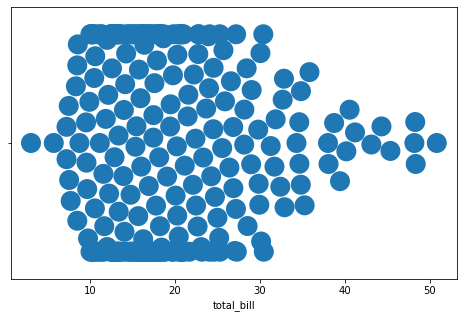

In [89]:
# size cok buyudugunde uyarı verir
plt.figure(figsize=(8,5))
sns.swarmplot(x="total_bill", data=tips, size=20);

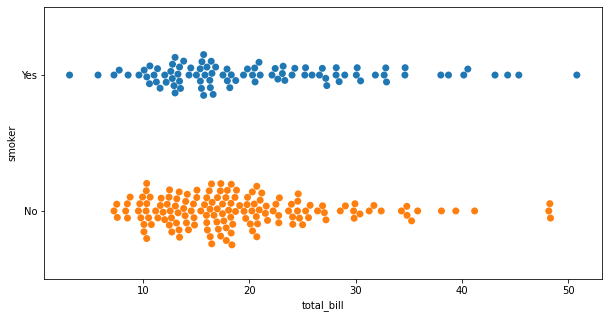

In [90]:
sns.swarmplot(x = "total_bill", y="smoker", data=tips, size = 7);

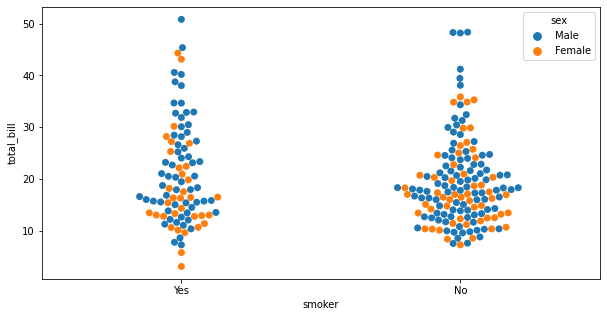

In [92]:
sns.swarmplot(y = "total_bill", x="smoker", hue="sex", data=tips, size = 7);

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Optional Swarmplot Example</p>

<a id="5.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

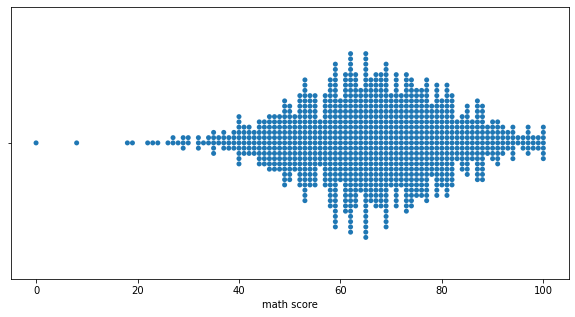

In [93]:
sns.swarmplot(x="math score", data=df);

/Users/kadiryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


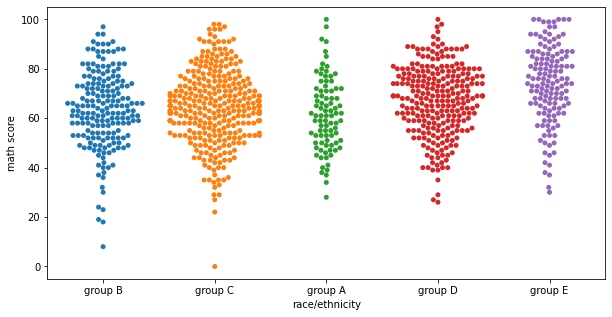

In [95]:
sns.swarmplot(y="math score", x="race/ethnicity", data=df);

/Users/kadiryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


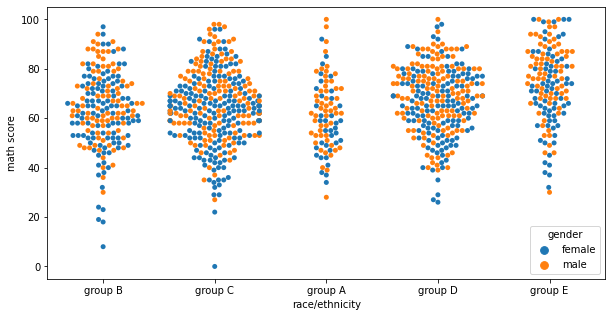

In [96]:
sns.swarmplot(y="math score", x="race/ethnicity", data=df, hue="gender");

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">"dodge" Parameter</p>

<a id="5.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

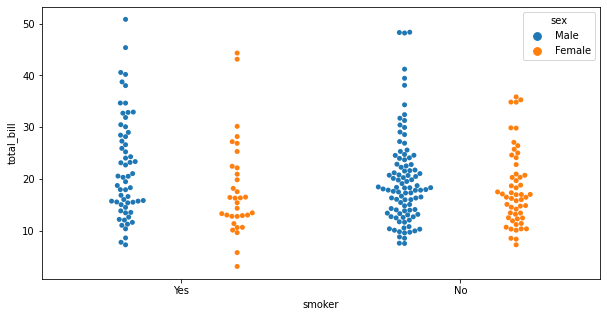

In [97]:
# ayrı ayrı gprelim kategorileri
sns.swarmplot(x="smoker", y="total_bill", data=tips, hue="sex", dodge=True);

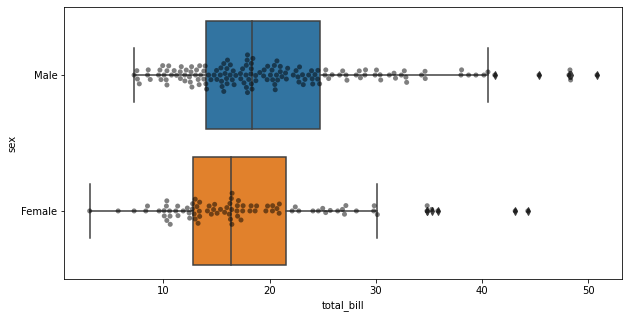

In [98]:
sns.boxplot(x="total_bill", y="sex", data=tips)
sns.swarmplot(x="total_bill", y="sex", data=tips, color="black", alpha=0.5); 

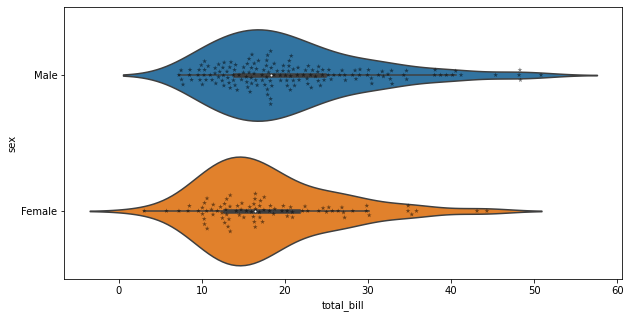

In [99]:
sns.violinplot(x="total_bill", y="sex", data=tips)
sns.swarmplot(x="total_bill", y="sex", data=tips, color="black", alpha=0.5, size = 5, marker = "*"); 

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:CENTER; border-radius:10px 10px;">BOXENPLOT (LETTER-VALUE PLOT)</p>

<a id="6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Official Paper on this plot: [Official Paper](https://vita.had.co.nz/papers/letter-value-plot.html)

This style of plot was originally named a “letter value” plot because it shows a large number of quantiles that are defined as “letter values”. It is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails.

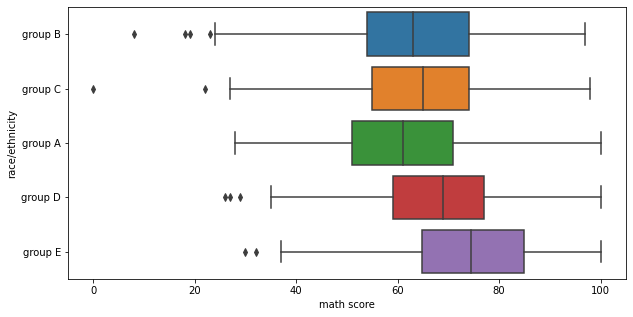

In [101]:
sns.boxplot(x="math score", y= "race/ethnicity", data=df);

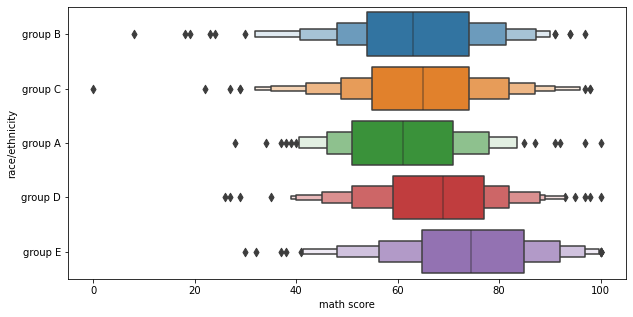

In [102]:
sns.boxenplot(x="math score", y= "race/ethnicity", data=df);
# ozellikle buyuk veri setlerinde faydalı. outliersları daha iyi gosterir. whiskerslar da daha iyidir.
# yaklasik 5 ila 8 outlier kalacak sekidle quartilelara ayırır veriyi.
# burada kucuk bir veri soz konusu. math scoreda 40tan asagisina veya 85ten yukarısına outlier demis ki bu mantikli degil

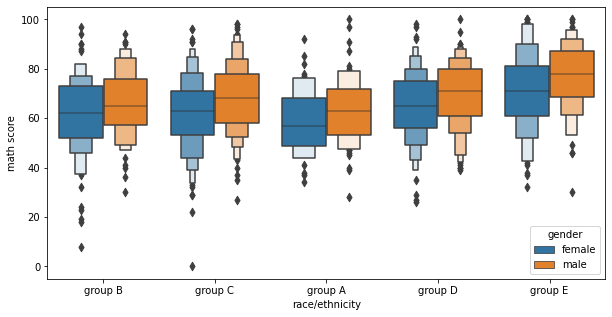

In [103]:
# dikey yapılabilir, hue eklenebilir
sns.boxenplot(y="math score", x= "race/ethnicity", data=df, hue="gender");

The box plot shows the median as the centerline (50th percentile), then the 25th and 75th percentile as the box boundaries. Then the IQR method is used to calculate outlier boundaries (1.5 * IQR + Q3 for the upper boundary, for example). Q3 is the 3rd quartile, or 75th percentile of the data (75% of the data is below this value). Outliers outside of the outlier whiskers are shown as distinct points.

Boxenplots (actually called letter-value plots in the original paper and in the lvplot R package) show the distribution differently and are better for bigger datasets. Classic boxplots can have too many outliers and don't show as much information about the distribution. Letter-value plots (boxenplots) start with the median (Q2, 50th percentile) as the centerline. Each successive level outward contains half of the remaining data. So the first two sections out from the centerline contain 50% of the data. After that, the next two sections contain 25% of the data. This continues until we are at the outlier level. Each level out is shaded lighter. There are 4 methods for calculating outliers (described in the paper and available in seaborn). The default is to end up with around 5-8 outliers in each tail.

![Capture13.PNG](https://i.ibb.co/YfpTDg9/Capture13.png)

[SOURCE 01](https://vita.had.co.nz/papers/letter-value-plot.html) & [SOURCE 02](https://stackoverflow.com/questions/52403381/how-boxen-plot-is-different-from-box-plot)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:CENTER; border-radius:10px 10px;">LINEPLOT</p>

<a id="7"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

[SOURCE](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

In [104]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


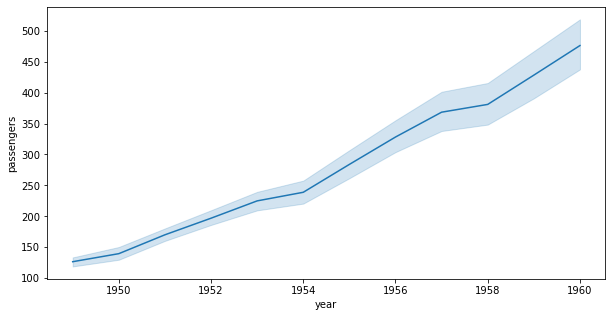

In [106]:
sns.lineplot(x="year", y="passengers", data=flights);
# month feature kulanmaıdık, burda her yıl için ortalam yolcu sayısını gosterir. estimator default mean, taralı alan
# ise confidence interval (ci parametresi var)

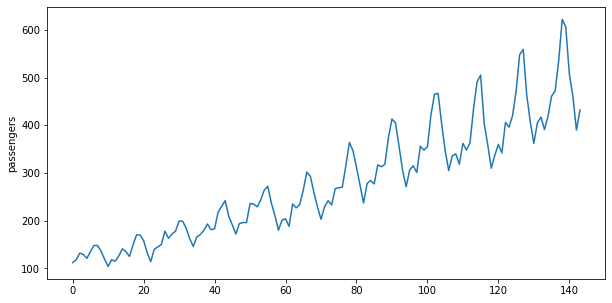

In [109]:
# her bir yılın ayları icin nasıl yaparız
sns.lineplot(y=flights.passengers, x=flights.index);

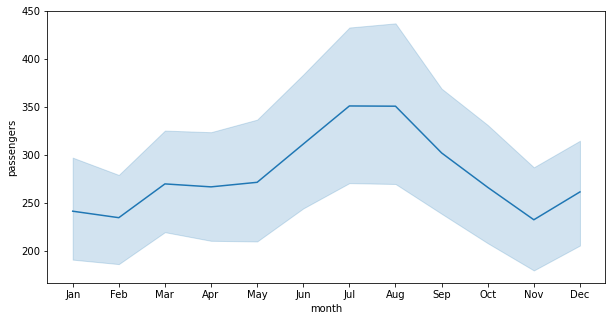

In [110]:
# aylara gore yolcu sayılarının degisimi. yazın artis kisin azalis..
sns.lineplot(x="month", y="passengers", data=flights);

In [115]:
# yılların sadece mayıs ayına ait yolcu sayılarını gosterelim

x = flights[flights["month"]=="May"]
x

,year,month,passengers
4,1949,May,121
16,1950,May,125
28,1951,May,172
40,1952,May,183
52,1953,May,229
64,1954,May,234
76,1955,May,270
88,1956,May,318
100,1957,May,355
112,1958,May,363


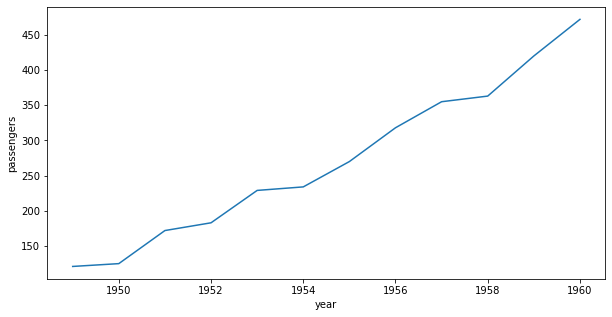

In [118]:
sns.lineplot(x = x["year"], y="passengers", data=flights);

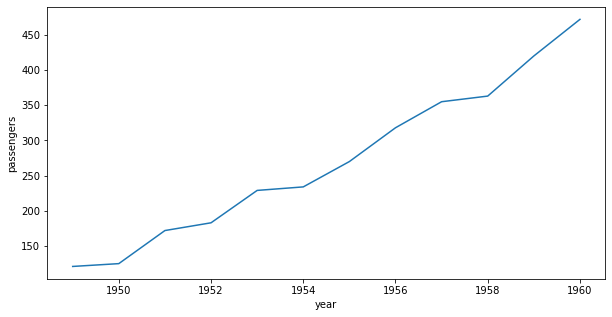

In [117]:
sns.lineplot(x= flights[flights['month'] == 'May'].year, y= flights.passengers);

In [121]:
# pivot islemi uygulayalım
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<AxesSubplot:xlabel='year'>

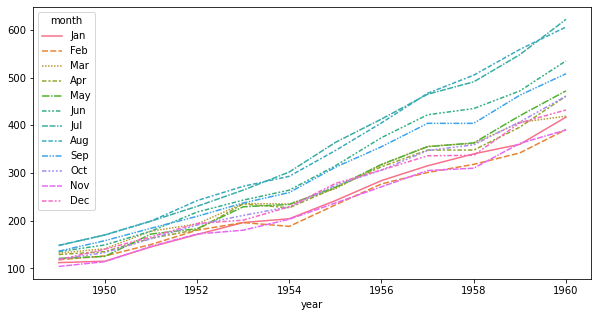

In [122]:
sns.lineplot(data=flights_wide)

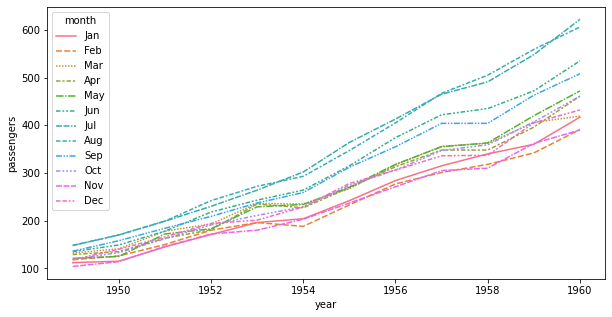

In [123]:
# aynısını pivotsuz yapalım

sns.lineplot(x="year", y="passengers", data=flights, hue="month", style="month");

In [ ]:
# transpose alarak yapalım

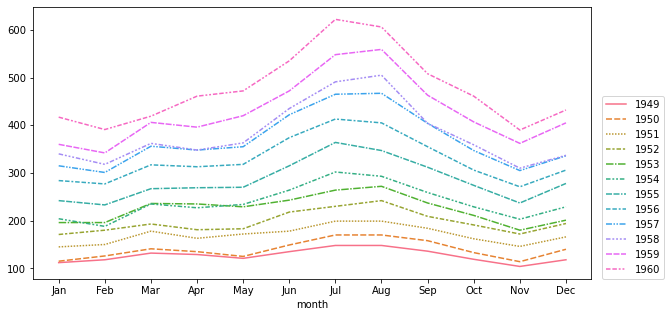

In [125]:
sns.lineplot(data=flights_wide.T)
plt.legend(loc=(1.02,0));
# ayları x eksenine verdi, yılları da style, hue olarak aldı

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">THE END OF THE SEABORN SESSION 02</p>

<a id="8"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>